# Assignment 2

Due Date:  11:59pm on Friday, October 2nd (for now)

## Question 1 - Fitting Part Deux

In the Jupyter Notebook called Fitting_Examples.ipynb, the last few examples considered cases where the uncertainty in the data became
larger at small x-values.  We considered three scenarios for collecting
the data - one where we focused on small x-values, and two others that covered larger ranges of x.

For this question, begin with the Jupyter Notebook above, and modify it
to consider 10 x-value ranges that keep the minimum value of the range constant (and fairly close to zero) while varying the maximum x-value from small to larger values.  For each x-value range, calculate the uncertainty in the y-intercept, and then create a plot of the uncertainty as a function of that maximum x-value of the range.

Now, consider keeping the maximum x-value of the range constant, and vary the minimum value of the range from a small value, close to zero, to a larger value that is close to the maximum value.  Create a plot of the
uncertainty in the y-intercept as a function of the minimum x-value of the range.

What can you conclude from this study about the optimal experiment design?

# Fitting Stuff

We have already seen examples of both linear and non-linear regression fits to data.  In most (maybe all?) experiments though, we often have uncertainties associated with each data point.  We should understand more about how this affects the fitting procedure.

The linear/non-linear regression examples that we have studied thus far use a method called "Ordinary Least Squares".  The basic theory behind this is:

$\chi^2 = \sum_i^N (y_i - y_{fit}(x_i))^2$

where $y_{fit} = f(a,b,c,...)$ is the fitting function.  The idea is that we must solve the set of equations defined by:

$\frac{\partial \chi^2}{\partial a} = 0, \frac{\partial \chi^2}{\partial b} = 0, \frac{\partial \chi^2}{\partial c} = 0, ...$

In the case of polynomial fitting functions (or any order), the values of the polynomial coefficients are uniquely defined.  That is, there is a single global minimum in the $\chi^2$ function.  For other non-linear fitting functions, there may be local minima in the $\chi^2$ function, and this requires that we provide initial starting values for the parameters of the fitting function that are close to the global minimum.

When we have uncertainties for each of the $N$ data points, the definition of $\chi^2$ becomes:

$\chi^2 = \sum_i^N \left (\frac{y_i - y_{fit}(x_i)}{\sigma_i}\right)^2$

### Let us now investigate how uncertainties affect both (a) the fit parameters and (b) the confidence interval on the fit.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit


In [12]:
# create 10 x-value ranges 10 x-value ranges that keep the minimum value of the range constant
#(and fairly close to zero) while varying the maximum x-value from small to larger values.
list_of_10_sets = []
for i in range (0,5):
  npts = 11
  xlow = 0.05
  xhigh = 10
  xl = xlow + 0.01
  xmid = (xhigh+xlow)/2.0+0.01
  xi = np.linspace(xlow,xhigh,npts)
  yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
  yi = xi + yrandom
  list_of_10_sets.append((xi,yi))

for i in range (0,5):
  npts = 11
  xlow = 0.05
  xhigh = 1.5
  xl = xlow + 0.01
  xmid = (xhigh+xlow)/2.0+0.01
  xi = np.linspace(xlow,xhigh,npts)
  yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
  yi = xi + yrandom
  list_of_10_sets.append((xi,yi))



# Plotted Data for 5 sets where xmax is high, followed by plotted data for 5 sets where xmax is low

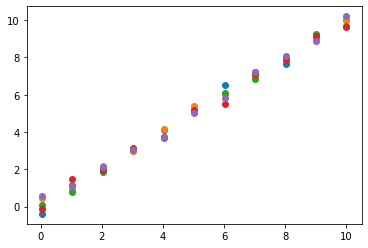

In [13]:
for i in range(0,5):
  plt.plot(list_of_10_sets[i][0],list_of_10_sets[i][1],'o')

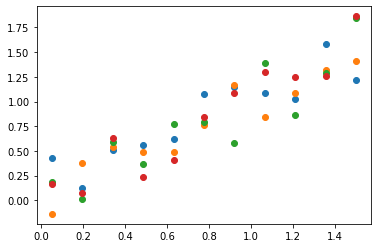

In [14]:
for i in range(5,9):
  plt.plot(list_of_10_sets[i][0],list_of_10_sets[i][1],'o')

## **All Indivudal Graphs for the 10 sets of data with uncertainty calculation**

In [15]:
unc_vs_max_X=[]
unc_vs_max_Y=[]
unc_vs_min_X=[]
unc_vs_min_Y=[]

In [16]:
#Populate data for all 10 datasets for min, max and unc values
for i in range (0,9):
  min = np.min(list_of_10_sets[i][1])
  max = np.max(list_of_10_sets[i][1])
  y_unc = max - min
  unc_vs_max_X.append(y_unc)
  unc_vs_max_Y.append(max)
  unc_vs_min_X.append(y_unc)
  unc_vs_min_Y.append(min)

Y uncer: +/-  10.384449089600537


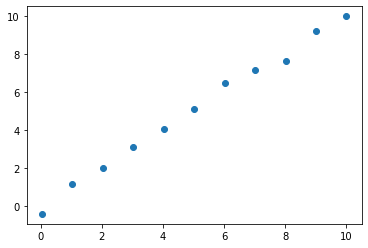

In [17]:
plt.plot(list_of_10_sets[0][0],list_of_10_sets[0][1],'o')
y_unc = np.max(list_of_10_sets[0][1]) -np.min(list_of_10_sets[0][1])
print("Y uncer: +/- ", y_unc)

Y uncer: +/-  9.522961538277574


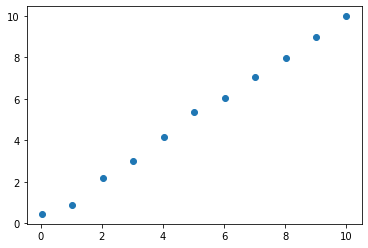

In [18]:
plt.plot(list_of_10_sets[1][0],list_of_10_sets[1][1],'o')
y_unc = np.max(list_of_10_sets[1][1]) -np.min(list_of_10_sets[1][1])
print("Y uncer: +/- ", y_unc)

Y uncer: +/-  9.588877411838663


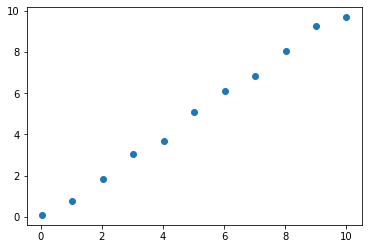

In [19]:
plt.plot(list_of_10_sets[2][0],list_of_10_sets[2][1],'o')
y_unc = np.max(list_of_10_sets[2][1]) -np.min(list_of_10_sets[2][1])
print("Y uncer: +/- ", y_unc)

Y uncer: +/-  9.722757045950349


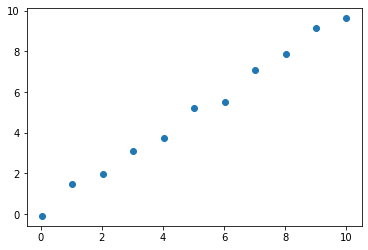

In [20]:
plt.plot(list_of_10_sets[3][0],list_of_10_sets[3][1],'o')
y_unc = np.max(list_of_10_sets[3][1]) -np.min(list_of_10_sets[3][1])
print("Y uncer: +/- ", y_unc)

Y uncer: +/-  9.609175058135493


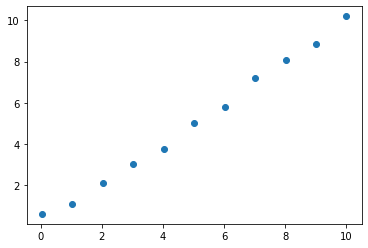

In [21]:
plt.plot(list_of_10_sets[4][0],list_of_10_sets[4][1],'o')
y_unc = np.max(list_of_10_sets[4][1]) -np.min(list_of_10_sets[4][1])
print("Y uncer: +/- ", y_unc)

Y uncer: +/-  1.4628679159473754


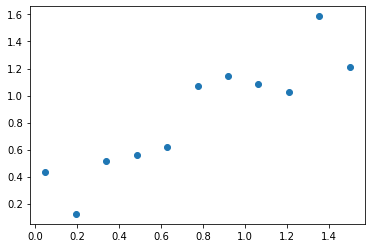

In [22]:
plt.plot(list_of_10_sets[5][0],list_of_10_sets[5][1],'o')
y_unc = np.max(list_of_10_sets[5][1]) -np.min(list_of_10_sets[5][1])
print("Y uncer: +/- ", y_unc)

Y uncer: +/-  1.549801526672653


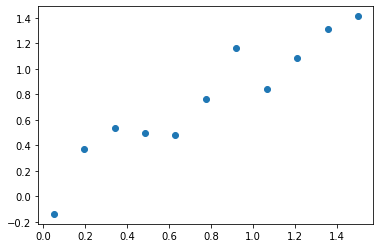

In [23]:
plt.plot(list_of_10_sets[6][0],list_of_10_sets[6][1],'o')
y_unc = np.max(list_of_10_sets[6][1]) -np.min(list_of_10_sets[6][1])
print("Y uncer: +/- ", y_unc)

Y uncer: +/-  1.8335360979531539


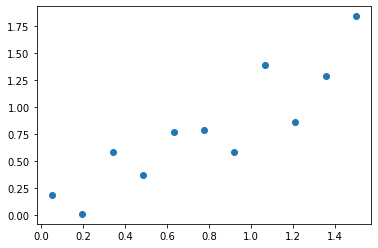

In [24]:
plt.plot(list_of_10_sets[7][0],list_of_10_sets[7][1],'o')
y_unc = np.max(list_of_10_sets[7][1]) -np.min(list_of_10_sets[7][1])
print("Y uncer: +/- ", y_unc)

Y uncer: +/-  1.784645710943154


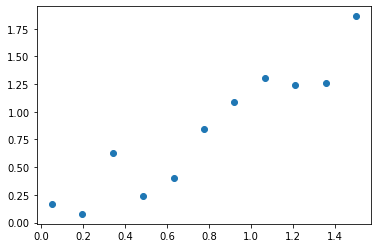

In [25]:
plt.plot(list_of_10_sets[8][0],list_of_10_sets[8][1],'o')
y_unc = np.max(list_of_10_sets[8][1]) -np.min(list_of_10_sets[8][1])
print("Y uncer: +/- ", y_unc)


Y uncer: +/-  1.6053959433164546


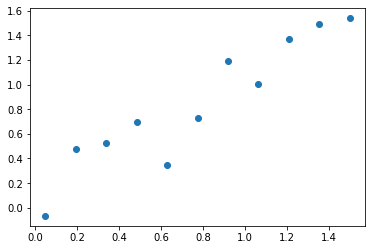

In [26]:
plt.plot(list_of_10_sets[9][0],list_of_10_sets[9][1],'o')
y_unc = np.max(list_of_10_sets[9][1]) -np.min(list_of_10_sets[9][1])
print("Y uncer: +/- ", y_unc)

Plot Uncertanties for Max values

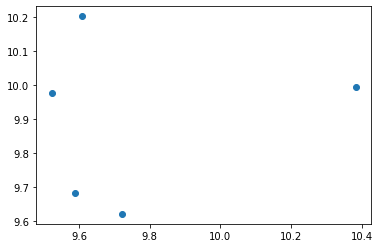

In [27]:
plt.plot(unc_vs_max_X[0:5],unc_vs_max_Y[0:5], 'o')

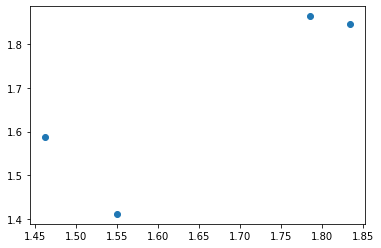

In [28]:
plt.plot(unc_vs_max_X[5:11],unc_vs_max_Y[5:11], 'o')

Varying the X Max Value

In [29]:
# create 10 x-value ranges 10 x-value ranges that keep the minimum value of the range constant
#(and fairly close to zero) while varying the maximum x-value from small to larger values.
list_of_10_sets = []
for i in range (0,5):
  npts = 11
  xlow = 0.05
  xhigh = 5
  xl = xlow + 0.01
  xmid = (xhigh+xlow)/2.0+0.01
  xi = np.linspace(xlow,xhigh,npts)
  yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
  yi = xi + yrandom
  list_of_10_sets.append((xi,yi))

for i in range (0,5):
  npts = 11
  xlow = 4
  xhigh = 5
  xl = xlow + 0.01
  xmid = (xhigh+xlow)/2.0+0.01
  xi = np.linspace(xlow,xhigh,npts)
  yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
  yi = xi + yrandom
  list_of_10_sets.append((xi,yi))



# Plotted Data for 5 sets where xmax is high, followed by plotted data for 5 sets where xmax is low

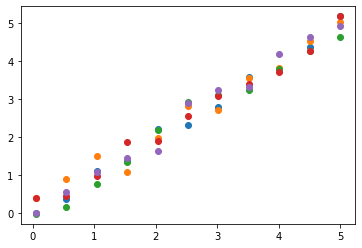

In [30]:
for i in range(0,5):
  plt.plot(list_of_10_sets[i][0],list_of_10_sets[i][1],'o')

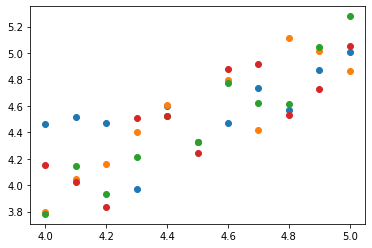

In [31]:
for i in range(5,9):
  plt.plot(list_of_10_sets[i][0],list_of_10_sets[i][1],'o')

In [32]:
unc_vs_max_X=[]
unc_vs_max_Y=[]
unc_vs_min_X=[]
unc_vs_min_Y=[]

In [33]:
#Populate data for all 10 datasets for min, max and unc values
for i in range (0,9):
  min = np.min(list_of_10_sets[i][1])
  max = np.max(list_of_10_sets[i][1])
  y_unc = max - min
  unc_vs_max_X.append(y_unc)
  unc_vs_max_Y.append(max)
  unc_vs_min_X.append(y_unc)
  unc_vs_min_Y.append(min)

Y uncer: +/-  5.143593889758944


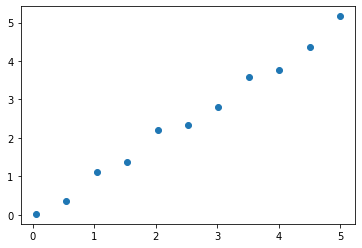

In [34]:
plt.plot(list_of_10_sets[0][0],list_of_10_sets[0][1],'o')
y_unc = np.max(list_of_10_sets[0][1]) -np.min(list_of_10_sets[0][1])
print("Y uncer: +/- ", y_unc)

Y uncer: +/-  4.613283635728392


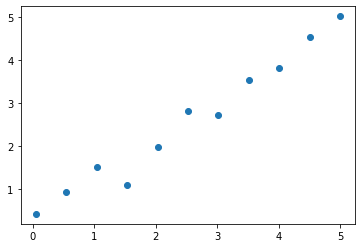

In [35]:
plt.plot(list_of_10_sets[1][0],list_of_10_sets[1][1],'o')
y_unc = np.max(list_of_10_sets[1][1]) -np.min(list_of_10_sets[1][1])
print("Y uncer: +/- ", y_unc)

Y uncer: +/-  4.6399410909638545


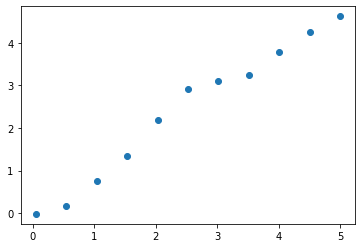

In [36]:
plt.plot(list_of_10_sets[2][0],list_of_10_sets[2][1],'o')
y_unc = np.max(list_of_10_sets[2][1]) -np.min(list_of_10_sets[2][1])
print("Y uncer: +/- ", y_unc)

Y uncer: +/-  4.764606884966586


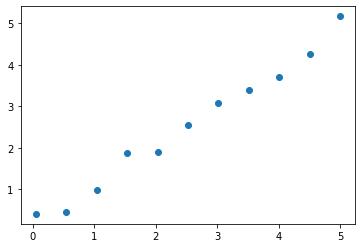

In [37]:
plt.plot(list_of_10_sets[3][0],list_of_10_sets[3][1],'o')
y_unc = np.max(list_of_10_sets[3][1]) -np.min(list_of_10_sets[3][1])
print("Y uncer: +/- ", y_unc)

Y uncer: +/-  4.905892513883218


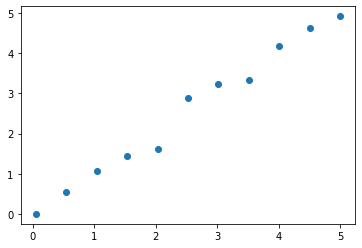

In [38]:
plt.plot(list_of_10_sets[4][0],list_of_10_sets[4][1],'o')
y_unc = np.max(list_of_10_sets[4][1]) -np.min(list_of_10_sets[4][1])
print("Y uncer: +/- ", y_unc)

Y uncer: +/-  1.0328420292897835


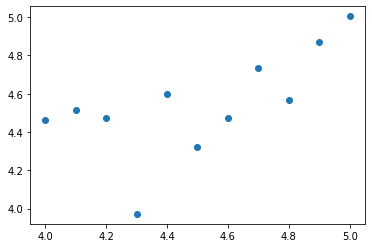

In [39]:
plt.plot(list_of_10_sets[5][0],list_of_10_sets[5][1],'o')
y_unc = np.max(list_of_10_sets[5][1]) -np.min(list_of_10_sets[5][1])
print("Y uncer: +/- ", y_unc)

Y uncer: +/-  1.3178527508080573


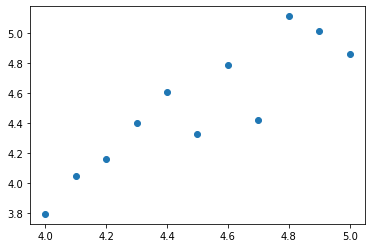

In [40]:
plt.plot(list_of_10_sets[6][0],list_of_10_sets[6][1],'o')
y_unc = np.max(list_of_10_sets[6][1]) -np.min(list_of_10_sets[6][1])
print("Y uncer: +/- ", y_unc)

Y uncer: +/-  1.4960148135944822


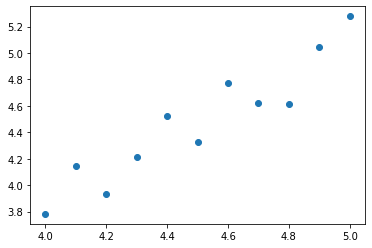

In [41]:
plt.plot(list_of_10_sets[7][0],list_of_10_sets[7][1],'o')
y_unc = np.max(list_of_10_sets[7][1]) -np.min(list_of_10_sets[7][1])
print("Y uncer: +/- ", y_unc)

Y uncer: +/-  1.2196295622238686


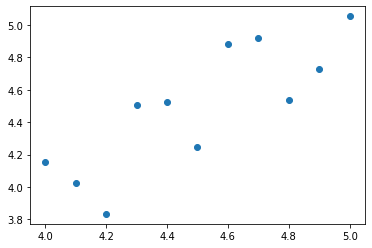

In [42]:
plt.plot(list_of_10_sets[8][0],list_of_10_sets[8][1],'o')
y_unc = np.max(list_of_10_sets[8][1]) -np.min(list_of_10_sets[8][1])
print("Y uncer: +/- ", y_unc)


Y uncer: +/-  1.2008900286411


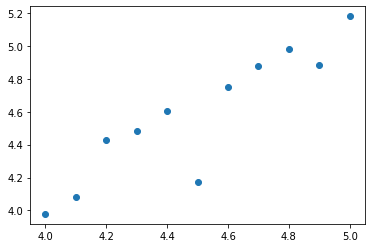

In [43]:
plt.plot(list_of_10_sets[9][0],list_of_10_sets[9][1],'o')
y_unc = np.max(list_of_10_sets[9][1]) -np.min(list_of_10_sets[9][1])
print("Y uncer: +/- ", y_unc)

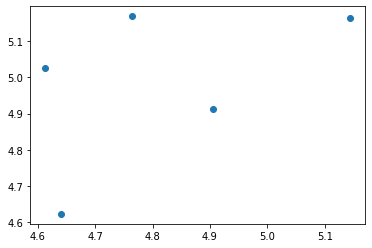

In [44]:
plt.plot(unc_vs_max_X[0:5],unc_vs_max_Y[0:5], 'o')

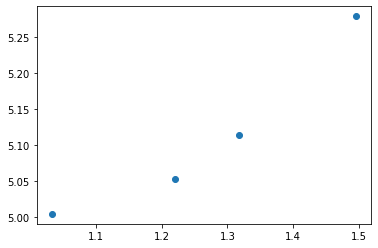

In [45]:
plt.plot(unc_vs_max_X[5:11],unc_vs_max_Y[5:11], 'o')

We expirence a much more consistent uncertanity when the minimum value of the range is a larger value that is close to the maximum value 

## Question 2 - Why is it cold?

Modify the Jupyter Notebook called GlobalTemperatures.ipynb to consider the temperature variations over the year for five locations - two in the northern hemisphere, one near the equator, and two in the southern hemisphere.  Do not use any of the same locations already considered.

What are the scale factors and offsets required to give a reasonable fit in each case?

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

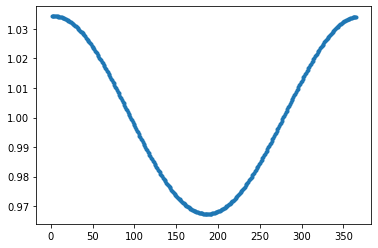

In [47]:
# Number of days in the sidereal year
daysPerYear = 365.256363

# Array to hold day of year

dayOfYear = np.array([i for i in range(1,366)])

# Earth-Sun Distance in A.U.
rES=1.0-0.01672*np.cos(2.0*np.pi/daysPerYear*(dayOfYear-4))
relPower=1/rES**2

plt.plot(dayOfYear,relPower,'.')

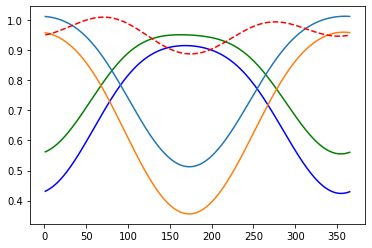

In [48]:
# tilt angle of the earth in 2020
tiltAngle = -23.44*np.pi/180.0

angle = tiltAngle*np.cos(2.0*np.pi/daysPerYear*(dayOfYear+10))

#two norther
angleBoston = 42.36011*np.pi/180.0 - angle
angleLA = 34.0522*np.pi/180.0 - angle
#two southern
angleBuenosAir = -34.6037*np.pi/180.0 - angle
angleQueenstown = -45.0302*np.pi/180.0-angle
#one equator 
angleMacapa = 0.0356*np.pi/180.0 - angle

plt.plot(dayOfYear,(np.cos(angleBoston)*relPower),'b')
plt.plot(dayOfYear,(np.cos(angleLA)*relPower),'g')
plt.plot(dayOfYear,(np.cos(angleBuenosAir)*relPower))
plt.plot(dayOfYear,(np.cos(angleQueenstown)*relPower))
plt.plot(dayOfYear,(np.cos(angleMacapa)*relPower),'r--')

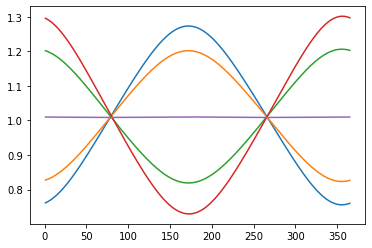

In [118]:
from Sun import Sun

coords = {'longitude': -71.0589, 'latitude': 42.3601}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionBO = dayLength/12.0

coords = {'longitude': -118.2437, 'latitude': 34.0522}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionLA = dayLength/12.0

coords = {'longitude': -58.3816, 'latitude': -34.6037}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionBA = dayLength/12.0

coords = {'longitude': 168.6616, 'latitude': -45.0302}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionQT = dayLength/12.0

coords = {'longitude': -51.0705, 'latitude': 0.0356}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionMP = dayLength/12.0

plt.plot(dayOfYear,lengthCorrectionBO)
plt.plot(dayOfYear,lengthCorrectionLA)
plt.plot(dayOfYear,lengthCorrectionBA)
plt.plot(dayOfYear,lengthCorrectionQT)
plt.plot(dayOfYear,lengthCorrectionMP)

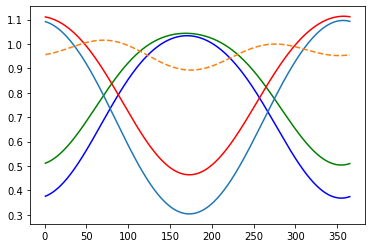

In [119]:
tempBOTheory = (np.cos(angleBoston)*relPower*np.sqrt(lengthCorrectionBO))
tempLATheory = (np.cos(angleLA)*relPower*np.sqrt(lengthCorrectionLA))
tempBATheory = (np.cos(angleBuenosAir)*relPower*np.sqrt(lengthCorrectionBA))
tempQTTheory = (np.cos(angleQueenstown)*relPower*np.sqrt(lengthCorrectionQT))
tempMacapaTheory = (np.cos(angleMacapa)*relPower*np.sqrt(lengthCorrectionMP))

plt.plot(dayOfYear,tempBOTheory,'b')
plt.plot(dayOfYear,tempLATheory,'g')
plt.plot(dayOfYear,tempBATheory,'r')
plt.plot(dayOfYear,tempQTTheory,)
plt.plot(dayOfYear,tempMacapaTheory,'--')

302.15


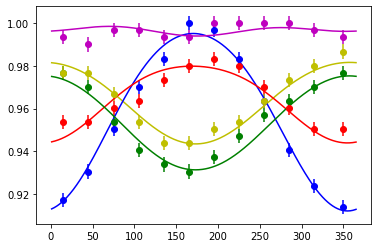

In [125]:
tempBO = np.array([3,4,8,14,20,24,29,28,24,18,11,6])+273.15
tempLA = np.array([14,15,15,17,18,21,23,24,23,20,17,14])+273.15
tempBA = np.array([25,22,22,19,15,12,12,14,15,18,21,23])+273.15
tempQT = np.array([22,22,20,15,11,9,8,10,13,16,18,20])+273.15
tempMP = np.array([27,27,26,28,28,27,27,29,29,29,29,28])+273.15

error = np.array([1 for i in range(12)])

mean = tempBO.max()
print(mean)
tempBO=tempBO/mean
tempMP=tempMP/mean
tempQT=tempQT/mean
tempBA = tempBA/mean
tempLA = tempLA/mean

error=error/mean

month = np.array([(15+30*(i-2)) for i in range(1,13)])
for i in range(len(month)):
    if month[i]<0:
        month[i]=month[i]+365

plt.errorbar(month,tempMP,yerr=error,fmt='mo')
plt.errorbar(month,tempLA,yerr=error,fmt='ro')
plt.errorbar(month,tempQT,yerr=error,fmt='go')
plt.errorbar(month,tempBO,yerr=error,fmt='bo')
plt.errorbar(month,tempBA,yerr=error,fmt='yo')
plt.plot(dayOfYear,(tempBATheory-1)/17+.975,'y')
plt.plot(dayOfYear,(tempBOTheory-1)/8+.991,'b')
plt.plot(dayOfYear,(tempLATheory-1)/15+.977,'r')
plt.plot(dayOfYear,(tempQTTheory-1)/18+.97,'g')
plt.plot(dayOfYear,(tempMacapaTheory-1)/27+.998,'m')

The values shown above are what I used to get the best fit of the data. Los Angelas was the most challneging to fit.

## Question 3 - Kater's Pendulum

Begin with the example Jupyter Notebook called KaterPendulum.ipynb.  Carry out a full analysis of the data obtained in the subdirectory called ~/KaterPendulum/data/scan2.  The file in this directory called kater_scan2_c2.dat will tell you what the x-positions of the small mass were (they are slightly different than in the example we covered in class).

Think about how to "clean" the raw data before proceeding with the fits.

What value of g is the "best" value for this data?  What value of the "fudge factor" offset gives the best comparison of the theory to the data? Is this a reasonable offset?

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
#  position of small mass (in cm)
xpos = np.array([1.045,2.044,3.012,4.012,5.061,6.011,7.044])
dxpos = np.array([0.003 for i in range(len(xpos))])

Periodup = 1.99644 +/- 0.00000821
Perioddown = 1.99350 +/- 0.00000855
Periodup = 1.99940 +/- 0.00000790
Perioddown = 1.99729 +/- 0.00000951
Periodup = 2.00225 +/- 0.00000704
Perioddown = 2.00111 +/- 0.00000879
Periodup = 2.00538 +/- 0.00000830
Perioddown = 2.00522 +/- 0.00000694
Periodup = 2.00853 +/- 0.00000815
Perioddown = 2.00923 +/- 0.00000776
Periodup = 2.01135 +/- 0.00000904
Perioddown = 2.01295 +/- 0.00000695
Periodup = 2.01496 +/- 0.00000739
Perioddown = 2.01722 +/- 0.00000901


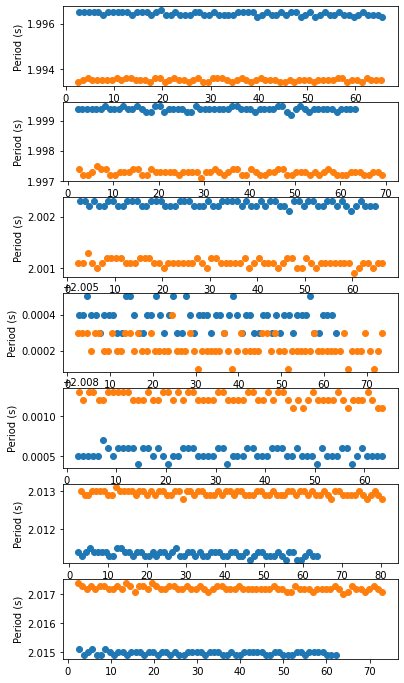

In [53]:
prefix = '/home/kater_5_run'
suffix = '.txt'

tup = []
tdown = []
dtup = []
dtdown = []

# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(6,12)) 

for i in range(1,8):
    i2 = 2*i
    j = 2*i - 1
    fname1 = prefix + str(i2) + suffix
    fname2 = prefix + str(j) + suffix

    dfup = pd.read_csv(fname1,sep='\t')
    dfdown = pd.read_csv(fname2,sep='\t')
    
    timeup = np.array(dfup['Time'])
    periodup = []
    for k in range(2,len(timeup)):
        periodup.append(timeup[k]-timeup[k-2])
    
    periodup=np.array(periodup)

    semup = periodup.std()/np.sqrt(len(periodup))
    print ("Periodup = %0.5f +/- %0.8f" % (periodup.mean(),semup))
    
    tup.append(periodup.mean())
    dtup.append(semup)
    
    timedown = np.array(dfdown['Time'])
    perioddown = []
    for k in range(2,len(timedown)):
        perioddown.append(timedown[k]-timedown[k-2])
    
    perioddown=np.array(perioddown)

    semdown = perioddown.std()/np.sqrt(len(perioddown))
    print ("Perioddown = %0.5f +/- %0.8f" % (perioddown.mean(),semdown))
    
    tdown.append(perioddown.mean())
    dtdown.append(semup)

    axs[i-1].plot(timeup[2:],periodup,'o')
    axs[i-1].plot(timedown[2:],perioddown,'o')
    axs[i-1].set_ylabel('Period (s)')
    
tup = np.array(tup)
tdown = np.array(tdown)
dtup = np.array(dtup)
dtdown = np.array(dtdown)

plt.show()

In [54]:
up = pd.DataFrame({'Xpos':xpos, 'Period':tup, 'dXpos':dxpos, 'dPeriod':dtup})
down = pd.DataFrame({'Xpos':xpos, 'Period':tdown, 'dXpos':dxpos, 'dPeriod':dtdown})

Coefficients (from curve_fit)
[1.99350442e+00 2.80858978e-03 3.17652678e-05]
Covariance Matrix (from curve_fit)
[[ 3.44064474e-08 -1.80812150e-08  1.99607107e-09]
 [-1.80812150e-08  1.10498147e-08 -1.30715053e-09]
 [ 1.99607107e-09 -1.30715053e-09  1.61683442e-10]]
Coefficients (from curve_fit)
[1.98942806e+00 3.85342244e-03 1.23215841e-05]
Covariance Matrix (from curve_fit)
[[ 2.32017152e-08 -1.21925481e-08  1.34595622e-09]
 [-1.21925481e-08  7.45091723e-09 -8.81394001e-10]
 [ 1.34595622e-09 -8.81394001e-10  1.09018871e-10]]


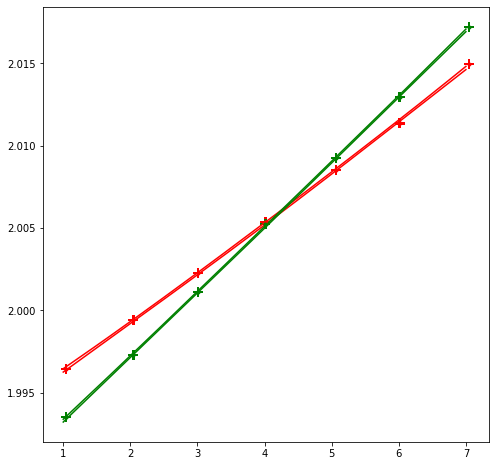

In [55]:
# Let's do linear fits using the curve_fit utility from scipy

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x + paramlist[2]*x*x

init_vals = [0.0 for x in range(3)]
x = np.array(up['Xpos'])
y = np.array(up['Period'])
poptu, pcovu = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptu,pcovu,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
loweru = np.percentile(ysample,16.0,axis=0)
upperu = np.percentile(ysample,84.0,axis=0)
middleu = (loweru+upperu)/2.0

print("Coefficients (from curve_fit)")
print (poptu)
print("Covariance Matrix (from curve_fit)")
print (pcovu)

init_vals = [0.0 for x in range(3)]
x = np.array(down['Xpos'])
y = np.array(down['Period'])
poptd, pcovd = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptd,pcovd,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lowerd = np.percentile(ysample,16.0,axis=0)
upperd = np.percentile(ysample,84.0,axis=0)
middled = (lowerd+upperd)/2.0

print("Coefficients (from curve_fit)")
print (poptd)
print("Covariance Matrix (from curve_fit)")
print (pcovd)

fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

#axs2.plot(xi,middleu)
axs2.plot(xi,loweru,'r')
axs2.plot(xi,upperu,'r')

#axs2.plot(xi,middle)
axs2.plot(xi,lowerd,'g')
axs2.plot(xi,upperd,'g')

#axs2.set_xlim(3.8,4.3)
#axs2.set_ylim(2.003,2.006)

plt.show()


In [56]:
tmin = []
for i in range(len(xi)):
    if loweru[i] < upperd[i]:
        tmin.append(loweru[i])
tmin = np.array(tmin)
tmin = tmin.min()

tmax = []
for i in range(len(xi)):
    if upperu[i] > lowerd[i]:
        tmax.append(upperu[i])
tmax = np.array(tmax)
tmax = tmax.max()

tbar = (tmax+tmin)/2.0
dtbar = (tmax-tmin)/2.0

print ("Period = %0.5f +/- %0.5f" % (tbar,dtbar))
            

Period = 2.00597 +/- 0.00048


In [57]:
length = 0.9986
dlength = 0.00005

g = 4*np.pi**2*length/tbar**2
dg = g*np.sqrt((dlength/length)**2+(2*dtbar/tbar)**2)

print ("g = %0.4f +/- %0.4f" % (g,dg))

g = 9.7972 +/- 0.0047


In [133]:
# Measured distances and masses
M=1.35928 # large mass
m=0.72705 # small mass
Mbar=2.90 # mass of bar (with small and large masses removed)
D=0.9986 # distance between knife-edge pivot points
L=1.523  # length of bar
#
#g = 9.799 # value of g in Newport News
g = 9.8144

# Distance calculations
#
# The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
# The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
# The radius of the large mass is 4.753 cm
# The radius of the small mass is 3.498 cm
RM = 0.04753
Rm = 0.03498
offsetM = 0.0135
offsetm = 0.0104
l1=D/2.0+RM+offsetM

# Find the value of x that satisfies the equation above

diff = 1.0E+99
olddiff = 1.0E+99
l2 = []
xpos = []
t1 = []
t2 = []
for i in range(1000):
    l2.append(D/2.0+Rm+(i/1000.0)*.12)
    xpos.append((l2[i]-offsetm-D/2-Rm-0.0000)*100) # distance from the small mass to the knife-edge, in cm.
    x=(M*l1-m*l2[i])/(M+m+Mbar)
    h2=D/2.0+x
    h1=D/2.0-x
    lhs=h1*h2;
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2[i]+x)*(l2[i]+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    diff = lhs-rhs
    if (np.abs(diff)<olddiff):
        olddiff=diff
        index=i
    t1.append(2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1)))
    t2.append(2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2)))
    
#print (l2,t1,t2)

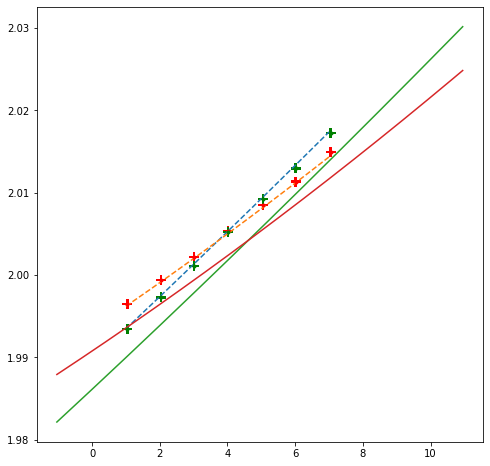

In [134]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

axs2.plot(xi,middleu,'--')
#axs2.plot(xi,loweru,'r')
#axs2.plot(xi,upperu,'r')

axs2.plot(xi,middled,'--')
#axs2.plot(xi,lowerd,'g')
#axs2.plot(xi,upperd,'g')

#axs2.set_xlim(3.8,4.3)
#axs2.set_ylim(2.003,2.006)

axs2.plot(xpos,t1,label='Small Mass Down')
axs2.plot(xpos,t2,label='Small Mass Up')

plt.show()

## So, we can see that the choice of the extra "fudge factor" offset changes for the chosen value of g.

### The next approach is to fit the data with the theoretical functions, rather than a simple quadratic polynomial.  The adjustable parameters in the fit function will be the value of g and the fudge factor.


Coefficients (from curve_fit)
[10.06162645]
Covariance Matrix (from curve_fit)
[[7.78275353e-05]]
Coefficients (from curve_fit)
[10.01150114]
Covariance Matrix (from curve_fit)
[[1.83415981e-05]]


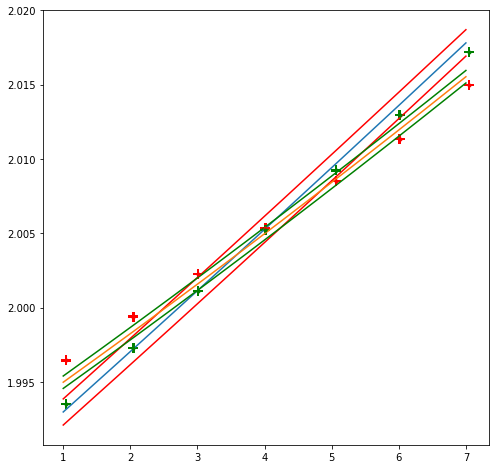

In [138]:
def theoryfitfunction1(xdata,*paramlist):
    
    M=1.35928 # large mass
    m=0.72705 # small mass
    Mbar=2.90 # mass of bar (with small and large masses removed)
    D=0.9986 # distance between knife-edge pivot points
    L=1.523  # length of bar
    
    g = paramlist[0]
    #fudge_factor = paramlist[1]
    fudge_factor=0.0700

    # Distance calculations
    #
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
    # The radius of the large mass is 4.753 cm
    # The radius of the small mass is 3.498 cm
    RM = 0.04753
    Rm = 0.03498
    offsetM = 0.0135
    offsetm = 0.0104
    l1=D/2.0+RM+offsetM
    
    l2 = D/2.0+Rm+offsetm+xdata/100.0+fudge_factor
    x=(M*l1-m*l2)/(M+m+Mbar)
    
    h2=D/2.0+x
    h1=D/2.0-x
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2+x)*(l2+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    
    t1 = 2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1))
    t2 = 2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2))
    
    return t1

def theoryfitfunction2(xdata,*paramlist):
    
    M=1.35928 # large mass
    m=0.72705 # small mass
    Mbar=2.90 # mass of bar (with small and large masses removed)
    D=0.9986 # distance between knife-edge pivot points
    L=1.523  # length of bar
    
    g = paramlist[0]
    #fudge_factor = paramlist[1]
    fudge_factor=0.07

    # Distance calculations
    #
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
    # The radius of the large mass is 4.753 cm
    # The radius of the small mass is 3.498 cm
    RM = 0.04753
    Rm = 0.03498
    offsetM = 0.0135
    offsetm = 0.0104
    l1=D/2.0+RM+offsetM
    
    l2 = D/2.0+Rm+offsetm+xdata/100.0+fudge_factor
    x=(M*l1-m*l2)/(M+m+Mbar)
    
    h2=D/2.0+x
    h1=D/2.0-x
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2+x)*(l2+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    
    t1 = 2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1))
    t2 = 2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2))
    
    return t2

init_vals = [9.814]
x = np.array(up['Xpos'])
y = np.array(up['Period'])
poptu, pcovu = curve_fit(theoryfitfunction1,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptu,pcovu,10000)
ysample=np.asarray([theoryfitfunction1(xi,*pi) for pi in ps])
loweru = np.percentile(ysample,16.0,axis=0)
upperu = np.percentile(ysample,84.0,axis=0)
middleu = (loweru+upperu)/2.0

print("Coefficients (from curve_fit)")
print (poptu)
print("Covariance Matrix (from curve_fit)")
print (pcovu)

init_vals = [9.814]
x = np.array(down['Xpos'])
y = np.array(down['Period'])
poptd, pcovd = curve_fit(theoryfitfunction2,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptd,pcovd,10000)
ysample=np.asarray([theoryfitfunction2(xi,*pi) for pi in ps])
lowerd = np.percentile(ysample,16.0,axis=0)
upperd = np.percentile(ysample,84.0,axis=0)
middled = (lowerd+upperd)/2.0

print("Coefficients (from curve_fit)")
print (poptd)
print("Covariance Matrix (from curve_fit)")
print (pcovd)

fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

axs2.plot(xi,middleu)
axs2.plot(xi,loweru,'r')
axs2.plot(xi,upperu,'r')

axs2.plot(xi,middled)
axs2.plot(xi,lowerd,'g')
axs2.plot(xi,upperd,'g')

#axs2.set_xlim(3.8,4.3)
#axs2.set_ylim(2.003,2.006)

plt.show()

In [139]:
tmin = []
for i in range(len(xi)):
    if loweru[i] < upperd[i]:
        tmin.append(loweru[i])
tmin = np.array(tmin)
tmin = tmin.min()

tmax = []
for i in range(len(xi)):
    if upperu[i] > lowerd[i]:
        tmax.append(upperu[i])
tmax = np.array(tmax)
tmax = tmax.max()

tbar = (tmax+tmin)/2.0
dtbar = (tmax-tmin)/2.0

print ("Period = %0.5f +/- %0.5f" % (tbar,dtbar))
            

Period = 2.00540 +/- 0.01331


In [140]:
length = 0.9986
dlength = 0.00005

g = 4*np.pi**2*length/tbar**2
dg = g*np.sqrt((dlength/length)**2+(2*dtbar/tbar)**2)

print ("g = %0.4f +/- %0.4f" % (g,dg))

g = 9.8028 +/- 0.1301


A fudge factor of 1.0 will allow our new g value to be consistent with your first 9.797 value. However, a much smaller value, of around 0.07 yields a closer to value to the gravity constant.